In [114]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

from jax import random
import jax.numpy as jnp
import numpyro.distributions as dist
from numpyro.diagnostics import hpdi

az.style.use("arviz-darkgrid")

In [115]:
def grid_posterior(obs, total_count, prior, p_grid):
    # compute likelihood at each value in grid
    likelihood = jnp.exp(dist.Binomial(total_count=total_count, probs=p_grid).log_prob(obs))

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / jnp.sum(unstd_posterior)

    return posterior

In [116]:
# define grid
p_grid = jnp.linspace(start=0, stop=1, num=1000)

# define prior
prior = jnp.repeat(1, 1000)

# compute posterior
posterior = grid_posterior(obs=6, total_count=9, prior=prior, p_grid=p_grid)

# sample
num_samples = int(1e4)
samples = p_grid[dist.Categorical(probs=posterior).sample(random.PRNGKey(0), (num_samples,))]

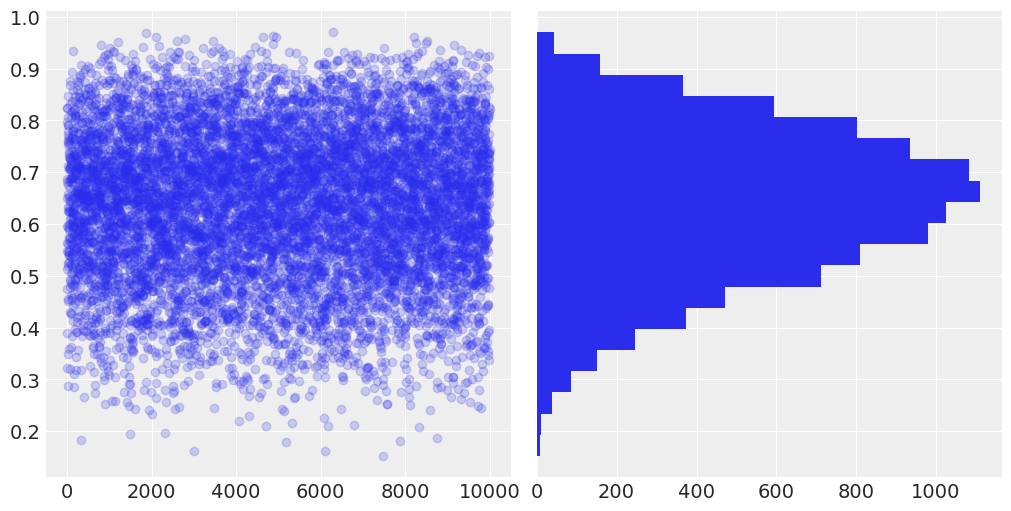

In [117]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)
ax[0].scatter(range(len(samples)), samples, alpha=0.2);
ax[1].hist(samples, bins=20, orientation="horizontal");

## 3E1

In [118]:
jnp.sum(samples < .2) / num_samples

DeviceArray(0.0009, dtype=float32)

## 3E2

In [119]:
jnp.sum(samples > .8) / num_samples

DeviceArray(0.1268, dtype=float32)

## 3E3

In [120]:
jnp.sum((samples < .8) & (samples > 0.2)) / num_samples

DeviceArray(0.8723, dtype=float32)

## 3E4

In [121]:
jnp.quantile(samples, 0.2)

DeviceArray(0.5155155, dtype=float32)

## 3E5

In [122]:
jnp.quantile(samples, 0.8)

DeviceArray(0.7637638, dtype=float32)

## 3E6

In [123]:
hpdi(samples, prob=2/3)

array([0.5045045, 0.7827828], dtype=float32)

## 3E7

In [124]:
jnp.percentile(samples, q=(100/6, 500/6))

DeviceArray([0.4974975, 0.7787788], dtype=float32)

## 3M1

In [125]:
posterior = grid_posterior(obs=8, total_count=15, prior=prior, p_grid=p_grid)

## 3M2

In [126]:
samples = p_grid[dist.Categorical(probs=posterior).sample(random.PRNGKey(0), (num_samples,))]
hpdi(samples, prob=0.9)

array([0.33633634, 0.7267267 ], dtype=float32)

## 3M3

DeviceArray(0.1542, dtype=float32)

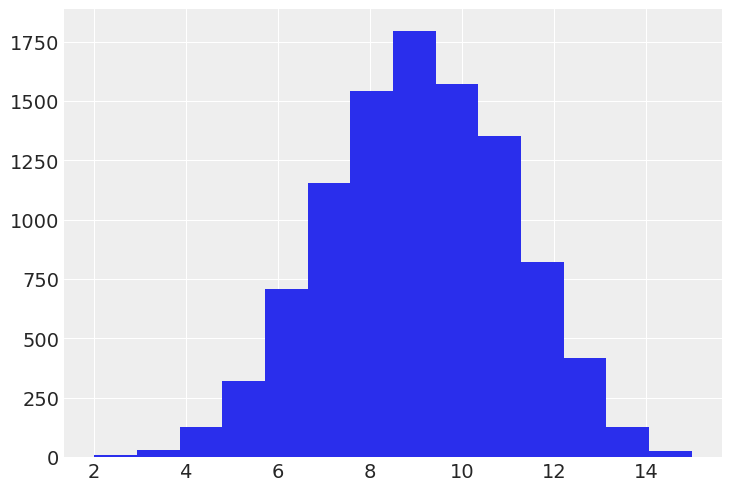

In [133]:
w = dist.Binomial(total_count=15, probs=samples).sample(random.PRNGKey(0))
plt.hist(w, bins=14)
jnp.sum(w == 8) / num_samples

## 3M4

DeviceArray(0.228, dtype=float32)

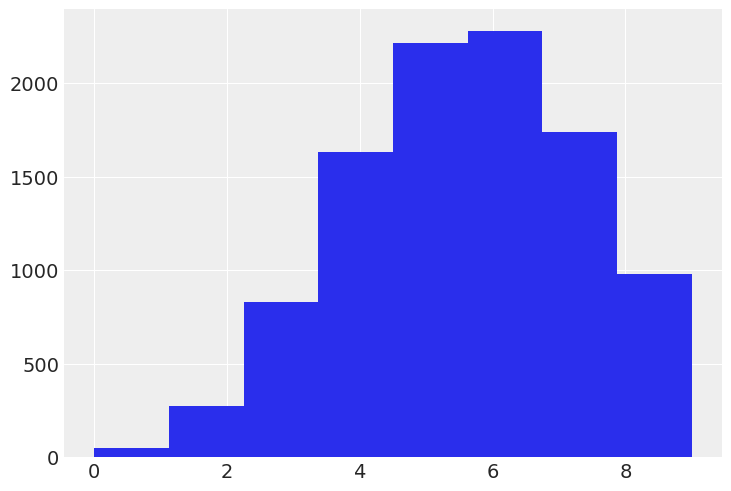

In [134]:
w = dist.Binomial(total_count=9, probs=samples).sample(random.PRNGKey(0))
plt.hist(w, bins=8)
jnp.sum(w == 6) / num_samples

## 3M5

In [142]:
prior = jnp.where(p_grid < 0.5, 0, 1)
posterior = grid_posterior(obs=8, total_count=15, prior=prior, p_grid=p_grid)
samples = p_grid[dist.Categorical(probs=posterior).sample(random.PRNGKey(0), (num_samples,))]
print(f"90% HDPI: {hpdi(samples, prob=0.9)}")

w_15 = dist.Binomial(total_count=15, probs=samples).sample(random.PRNGKey(0))
w_9 = dist.Binomial(total_count=9, probs=samples).sample(random.PRNGKey(0))

print(f"p_15 == 8: {jnp.sum(w_15 == 8) / num_samples: 0.3f}")
print(f"p_9 == 6: {jnp.sum(w_9 == 6) / num_samples: 0.3f}")

90% HDPI: [0.5005005 0.7157157]
p_15 == 8:  0.154
p_9 == 6:  0.228


## 3H1

In [145]:
birth1 = [
    1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
    0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
    1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
    0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
]
birth2 = [
    0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
    0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
    0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
]
sum(birth1) + sum(birth2)

111

In [152]:
num_births = len(birth1) + len(birth2)
num_boy = sum(birth1) + sum(birth2)

In [153]:
prior = jnp.repeat(1, 1000)
posterior = grid_posterior(obs=num_boy, total_count=num_births, prior=prior, p_grid=p_grid)

In [158]:
p_grid[jnp.argmax(posterior)]

DeviceArray(0.5545546, dtype=float32)

## 3H2

In [160]:
num_samples = int(1e4)
samples = p_grid[dist.Categorical(probs=posterior).sample(random.PRNGKey(0), (num_samples,))]

In [168]:
for p in (0.5, 0.89, 0.97):
    print(f"{p}:\t{hpdi(samples, prob=p)}")

0.5:	[0.5275275 0.5745746]
0.89:	[0.4974975 0.6096096]
0.97:	[0.4804805 0.6326326]


## 3H3

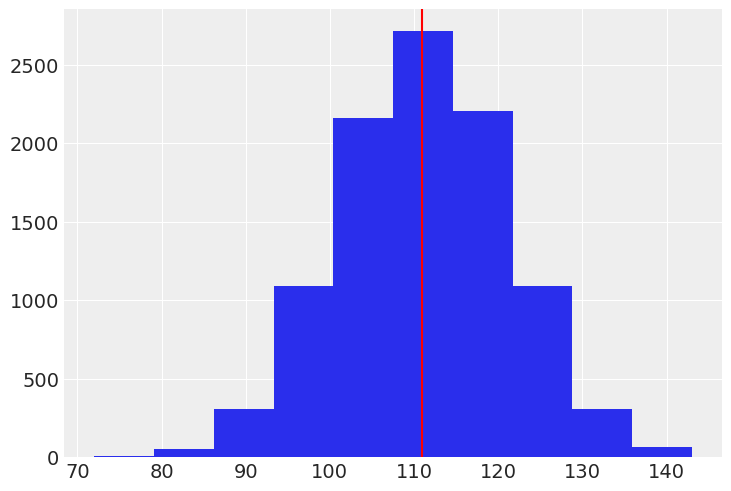

In [199]:
w = dist.Binomial(total_count=200, probs=samples).sample(random.PRNGKey(0))
plt.hist(w, bins=10);
plt.axvline(sum(birth1) + sum(birth2), color="red");

## 3H4

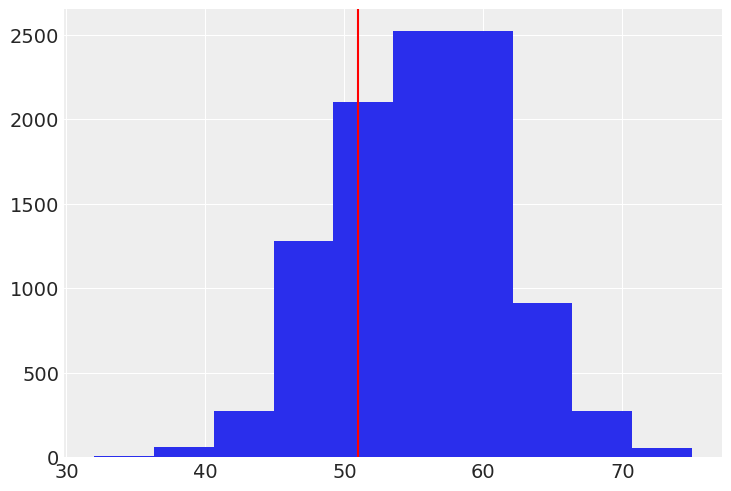

In [198]:
w = dist.Binomial(total_count=100, probs=samples).sample(random.PRNGKey(0))
plt.hist(w, bins=10);
plt.axvline(sum(birth1), color="red");

## 3H5

In [218]:
num_girls = len(birth1) - sum(birth1)
boys_after_girls = [b2 for b1, b2 in zip(birth1, birth2) if b1 == 0]

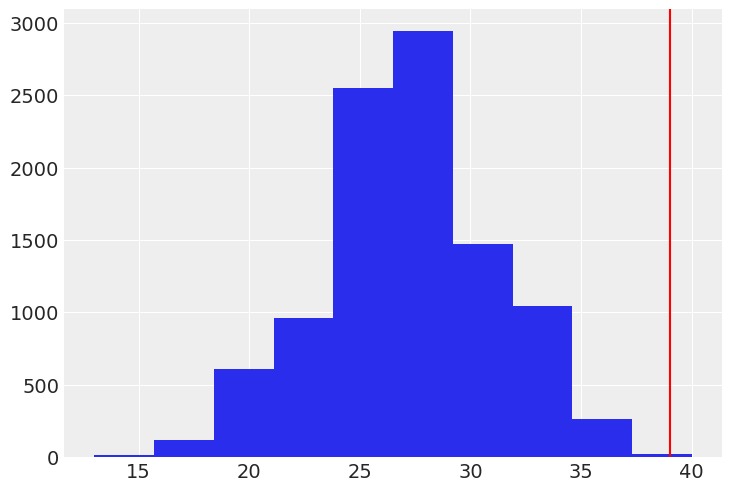

In [221]:
w = dist.Binomial(total_count=num_girls, probs=samples).sample(random.PRNGKey(0))
plt.hist(w, bins=10);
plt.axvline(sum(boys_after_girls), color="red");